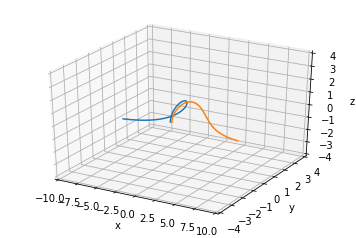

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


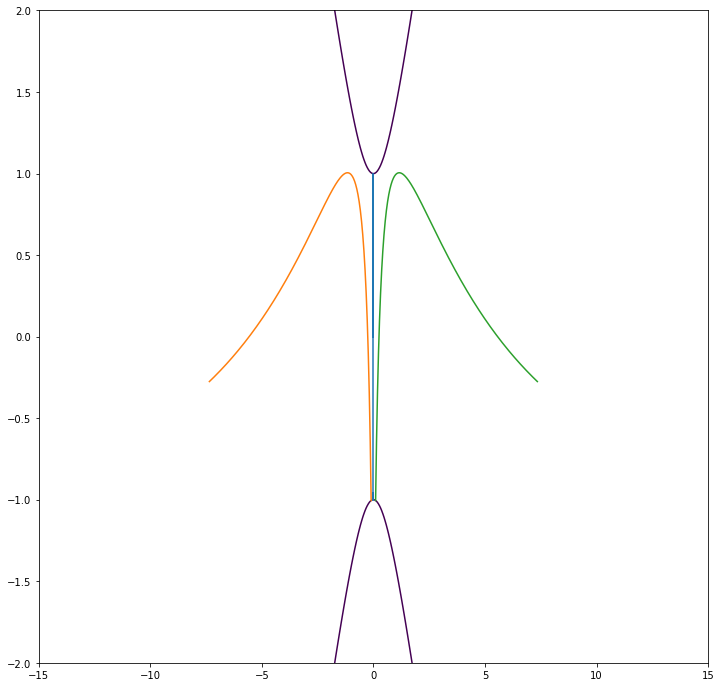

In [2]:
"""
We discuss the Turning Point method for finding periodic orbits.

"""

"""We use a 2-degree-of-freedom Hamiltonian system
H = lamd/2*(px^2-x^2) + omega/2*(py^2+y^2)"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,quad,trapz
import math
from IPython.display import Image # for Notebook
from IPython.core.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

omega = 1.0
lamb  = 1.0
"""Initial Condition for the true periodic orbit"""
state0_1 = [0,0.0 , 0.0,1.0]
"""Trial initial Condition s.t. the dot product of p_perpendicular_1 and p_perpendicular_2 is negative"""
state0_2 = [-0.1,0.0 , -math.sqrt(0.1**2+1),0.0]
state0_3 = [0.1,0.0 , -math.sqrt(0.1**2+1),0.0]
t = np.arange(0.0, 5.0, 0.01)


"""Define the Hamiltonian as a function""" 
def H(fun,t):
    x,px,y,py=fun
    derivative=[lamb*px,lamb*x, omega*py, -omega*y]
    return derivative


states1 = odeint(H, state0_1, t)
states2 = odeint(H, state0_2, t)
states3 = odeint(H, state0_3, t)
fig = plt.figure()
ax = fig.gca(projection='3d')
'ax.plot(states1[:,0], states1[:,2], states1[:,3])'
ax.plot(states2[:,0], states2[:,2], states2[:,3])
ax.plot(states3[:,0], states3[:,2], states3[:,3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-10, 10)
ax.set_ylim(-4, 4)
ax.set_zlim(-4, 4)
plt.show()

def potential(x,y):
    return -0.5*lamb*x**2+0.5*omega*y**2

def H_Contour(V):
    x=np.linspace(-5.0,5.0,200)
    y=np.linspace(-5.0,5.0,200)
    X,Y=np.meshgrid(x,y)
    Z=np.zeros((200,200))
    for i in range(200):
        for j in range(200):
            Z[i,j]=potential(X[i,j],Y[i,j])
    plt.figure(figsize=(12,12))
    plt.contour(X,Y,Z,V)
    ax = plt.axes()
    ax.plot(states1[:,0], states1[:,2])
    ax.plot(states2[:,0], states2[:,2])
    ax.plot(states3[:,0], states3[:,2])
    plt.xlim(-15,15)
    plt.ylim(-2,2)
    'plt.show()'
H_Contour([0.5])

In [3]:
"""
momentum(px,py) of 2 selected trajectories starting on the potential energy surface"""
p_1 = np.zeros((500,2))
p_2 = np.zeros((500,2))
p_1[:,0] = states2[:,1]
p_1[:,1] = states2[:,3]
p_2[:,0] = states3[:,1]
p_2[:,1] = states3[:,3]

for i in range(1,499):
    if np.sign(p_1[i+1,1]) != np.sign(p_1[i,1]) :
        p_perpendicular_1 = np.dot(p_1[i-2,:],p_1[i-2,:])*p_1[i-1,:] - np.dot(p_1[i-1,:],p_1[i-2,:])*p_1[i-2,:]
        p_perpendicular_2 = np.dot(p_2[i-2,:],p_1[i-2,:])*p_2[i-1,:] - np.dot(p_2[i-1,:],p_1[i-2,:])*p_2[i-2,:]
        print(i)
        print(states2[0,:],states3[0,:])
        print(np.dot(p_perpendicular_1,p_perpendicular_2))

314
[-0.1         0.         -1.00498756  0.        ] [ 0.1         0.         -1.00498756  0.        ]
-0.00017201394135385313


314
[-0.1         0.         -1.00498756  0.        ] [-0.1         0.         -1.00498756  0.        ]
0.0001720139413538531
314
[-0.1         0.         -1.00498756  0.        ] [-0.08397325  0.         -1.00351956  0.        ]
0.0001442346958156839
314
[-0.1         0.         -1.00498756  0.        ] [-0.06794649  0.         -1.0023057   0.        ]
0.00011656554588542598
314
[-0.1         0.         -1.00498756  0.        ] [-0.05191974  0.         -1.00134692  0.        ]
8.898565875733282e-05
314
[-0.1         0.         -1.00498756  0.        ] [-0.03589298  0.         -1.00064395  0.        ]
6.14740884689184e-05
314
[-0.1         0.         -1.00498756  0.        ] [-0.01986623  0.         -1.00019731  0.        ]
3.4009802020000426e-05
314
[-0.1         0.         -1.00498756  0.        ] [-0.00383948  0.         -1.00000737  0.        ]
6.571705938318415e-06
314
[-0.1         0.         -1.00498756  0.        ] [ 0.01218728  0.         -1.00007426  0.        ]
-2.0861326822

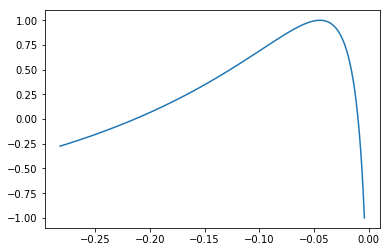

In [7]:
"""n is the number of intervals, h is the step size, 
p_1 & p_2 are the two points such that the periodic orbit exists between thses two points
we creat a list of initial conditions between p_1&p_2 in order to find a new p_2 s.t.
the 'dot product' between p_1 and the new p_2 is < 0.
The new p_2 is the initial condition for the perioic orbit
"""
n = 11
h = (state0_3[0]-state0_2[0])/n
p0Matrix = np.zeros((n,4))
stateorbit0_3 = [0,0,0,0]
for i in range(n):
    """consider the change in x coordinate"""
    state0_3 = [state0_2[0]+i*h,0.0 , -math.sqrt((state0_2[0]+i*h)**2+1),0.0]
    states3 = odeint(H, state0_3, t)
    p_2[:,0] = states3[:,1]
    p_2[:,1] = states3[:,3]
    for j in range(1,499):
        if np.sign(p_1[j+1,1]) != np.sign(p_1[j,1]) :
            p_perpendicular_1 = np.dot(p_1[j-2,:],p_1[j-2,:])*p_1[j-1,:] - np.dot(p_1[j-1,:],p_1[j-2,:])*p_1[j-2,:]
            p_perpendicular_2 = np.dot(p_2[j-2,:],p_1[j-2,:])*p_2[j-1,:] - np.dot(p_2[j-1,:],p_1[j-2,:])*p_2[j-2,:]
            print(j)
            tp = j
            p0Matrix[i,0] = tp
            print(states2[0,:],states3[0,:])
            p0Matrix[i,2] = states3[0,0]
            p0Matrix[i,3] = states3[0,2] 
            print(np.dot(p_perpendicular_1,p_perpendicular_2))
            p0Matrix[i,1] = np.dot(p_perpendicular_1,p_perpendicular_2)
for i in range(n-1):
    if p0Matrix[i+1,1] < 0 and p0Matrix[i,1] > 0:
        stateorbit0_3[0] = p0Matrix[i,2]
        stateorbit0_3[2] = p0Matrix[i,3]

statesnew0 = odeint(H, stateorbit0_3, t)
ax = plt.axes()
ax.plot(statesnew0[:,0], statesnew0[:,2])

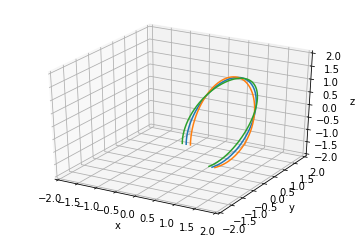

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


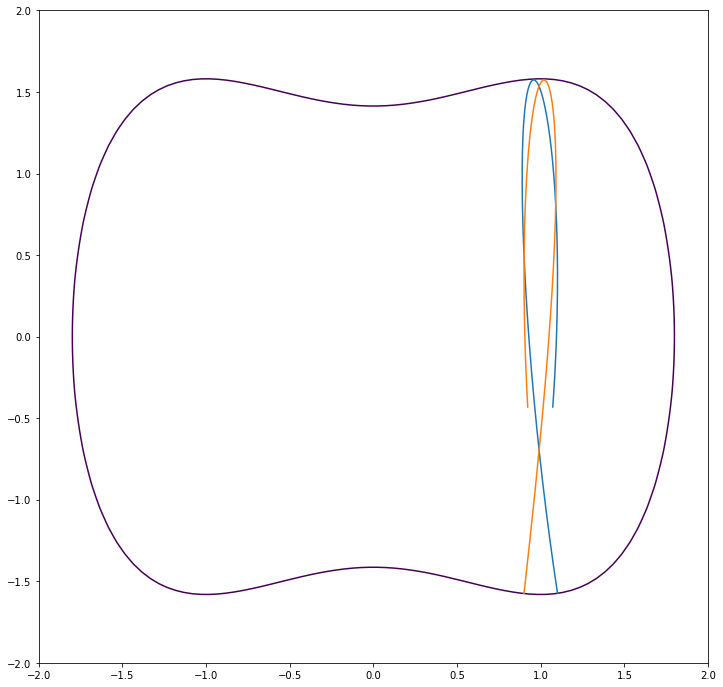

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,quad,trapz
import math
from IPython.display import Image # for Notebook
from IPython.core.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA


alpha = 1.0
beta = 1.0
omega = 1.0

"""Initial Condition for the true periodic orbit"""
state0_1 = [1,0.0 ,-math.sqrt(2.5) ,0.0]
"""Trial initial Condition s.t. the dot product of p_perpendicular_1 and p_perpendicular_2 is negative"""
state0_2 = [1.1,0.0 , -math.sqrt(2+1.1**2-0.5*1.1**4),0.0]
state0_3 = [0.9,0.0 , -math.sqrt(2+1.1**2-0.5*1.1**4),0.0]
t = np.arange(0.0, 5.0, 0.01)


"""Define the Hamiltonian as a function""" 
def H(fun,t):
    x,px,y,py=fun
    derivative=[px,alpha*x-beta*x**3, omega*py, -omega*y]
    return derivative


states1 = odeint(H, state0_1, t)
states2 = odeint(H, state0_2, t)
states3 = odeint(H, state0_3, t)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states1[:,0], states1[:,2], states1[:,3])
ax.plot(states2[:,0], states2[:,2], states2[:,3])
ax.plot(states3[:,0], states3[:,2], states3[:,3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
plt.show()

def potential(x,y):
    return -0.5*alpha*x**2+0.25*beta*x**4+0.5*omega*y**2

def H_Contour(V):
    x=np.linspace(-5.0,5.0,200)
    y=np.linspace(-5.0,5.0,200)
    X,Y=np.meshgrid(x,y)
    Z=np.zeros((200,200))
    for i in range(200):
        for j in range(200):
            Z[i,j]=potential(X[i,j],Y[i,j])
    plt.figure(figsize=(12,12))
    plt.contour(X,Y,Z,V)
    ax = plt.axes()
    'ax.plot(states1[:,0], states1[:,2])'
    ax.plot(states2[:,0], states2[:,2])
    ax.plot(states3[:,0], states3[:,2])
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    'plt.show()'
H_Contour([1.0])

In [3]:

"""
momentum(px,py) of 2 selected trajectories starting on the potential energy surface"""
p_1 = np.zeros((500,2))
p_2 = np.zeros((500,2))
p_1[:,0] = states2[:,1]
p_1[:,1] = states2[:,3]
p_2[:,0] = states3[:,1]
p_2[:,1] = states3[:,3]

for i in range(1,499):
    if np.sign(p_1[i+1,1]) != np.sign(p_1[i,1]) :
        p_perpendicular_1 = np.dot(p_1[i-2,:],p_1[i-2,:])*p_1[i-1,:] - np.dot(p_1[i-1,:],p_1[i-2,:])*p_1[i-2,:]
        p_perpendicular_2 = np.dot(p_2[i-2,:],p_1[i-2,:])*p_2[i-1,:] - np.dot(p_2[i-1,:],p_1[i-2,:])*p_2[i-2,:]
        print(i)
        print(states2[0,:],states3[0,:])
        print(np.dot(p_perpendicular_1,p_perpendicular_2))

314
[ 1.1         0.         -1.57415056  0.        ] [ 0.9         0.         -1.57415056  0.        ]
-8.556491658279623e-08


314
[ 1.1         0.         -1.57415056  0.        ] [ 1.1         0.         -1.57415056  0.        ]
8.873042110894636e-08
314
[ 1.1         0.         -1.57415056  0.        ] [ 1.08181818  0.         -1.57654488  0.        ]
7.303212855843597e-08
314
[ 1.1         0.         -1.57415056  0.        ] [ 1.06363636  0.         -1.57840971  0.        ]
5.698664131819479e-08
314
[ 1.1         0.         -1.57415056  0.        ] [ 1.04545455  0.         -1.57977144  0.        ]
4.0741792880575394e-08
314
[ 1.1         0.         -1.57415056  0.        ] [ 1.02727273  0.         -1.58065542  0.        ]
2.4418908462969057e-08
314
[ 1.1         0.         -1.57415056  0.        ] [ 1.00909091  0.         -1.58108608  0.        ]
8.117106906754876e-09
314
[ 1.1         0.         -1.57415056  0.        ] [ 0.99090909  0.         -1.58108703  0.        ]
-8.08277584848214e-09
314
[ 1.1         0.         -1.57415056  0.        ] [ 0.97272727  0.         -1.58068108  0.        ]
-2.411499566

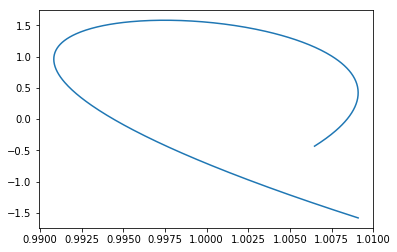

In [4]:

"""n is the number of intervals, h is the step size, 
p_1 & p_2 are the two points such that the periodic orbit exists between thses two points
we creat a list of initial conditions between p_1&p_2 in order to find a new p_2 s.t.
the 'dot product' between p_1 and the new p_2 is < 0.
The new p_2 is the initial condition for the perioic orbit
"""
n = 11
h = (state0_3[0]-state0_2[0])/n
p0Matrix = np.zeros((n,4))
stateorbit0_3 = [0,0,0,0]
for i in range(n):
    """consider the change in x coordinate"""
    state0_3 = [state0_2[0]+i*h,0.0 , -math.sqrt(2+(state0_2[0]+i*h)**2-0.5*(state0_2[0]+i*h)**4) ,0.0]
    states3 = odeint(H, state0_3, t)
    p_2[:,0] = states3[:,1]
    p_2[:,1] = states3[:,3]
    for j in range(1,499):
        if np.sign(p_1[j+1,1]) != np.sign(p_1[j,1]) :
            p_perpendicular_1 = np.dot(p_1[j-2,:],p_1[j-2,:])*p_1[j-1,:] - np.dot(p_1[j-1,:],p_1[j-2,:])*p_1[j-2,:]
            p_perpendicular_2 = np.dot(p_2[j-2,:],p_1[j-2,:])*p_2[j-1,:] - np.dot(p_2[j-1,:],p_1[j-2,:])*p_2[j-2,:]
            print(j)
            tp = j
            p0Matrix[i,0] = tp
            print(states2[0,:],states3[0,:])
            p0Matrix[i,2] = states3[0,0]
            p0Matrix[i,3] = states3[0,2] 
            print(np.dot(p_perpendicular_1,p_perpendicular_2))
            p0Matrix[i,1] = np.dot(p_perpendicular_1,p_perpendicular_2)
for i in range(n-1):
    if p0Matrix[i+1,1] < 0 and p0Matrix[i,1] > 0:
        stateorbit0_3[0] = p0Matrix[i,2]
        stateorbit0_3[2] = p0Matrix[i,3]

statesnew0 = odeint(H, stateorbit0_3, t)
ax = plt.axes()
ax.plot(statesnew0[:,0], statesnew0[:,2])

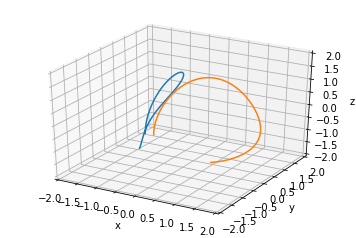

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3141
[-0.11       0.        -1.4184593  0.       ] [ 0.1         0.         -1.41772705  0.        ]
-4.723905481751059e-07
1
2
3
4
5


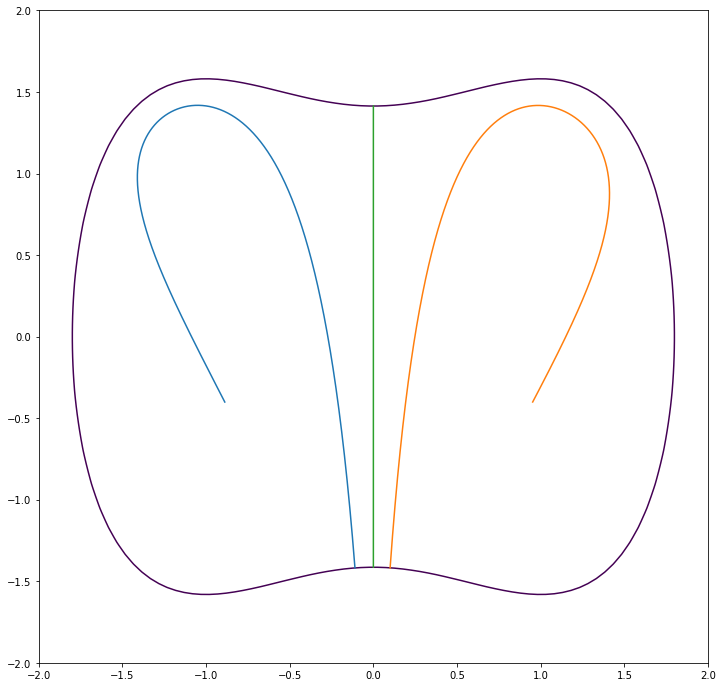

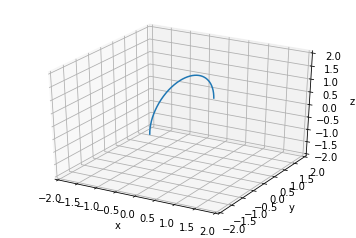

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,quad,trapz
import math
from IPython.display import Image # for Notebook
from IPython.core.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA


alpha = 1.0
beta = 1.0
omega = 1.0

"""Initial Condition for the true periodic orbit
H = T + V where T is the kinetic energy and V is the potential energy. In our example, 
the potential energy V = -0.5*alpha*x**2+0.25*beta*x**4+0.5*omega*y**2.
If we fix x, then y = +- math.sqrt((V +0.5*alpha*x**2-0.25*beta*x**4)/(0.5*omega) ) so that
the point starts at the potential energy surface V.

"""

state0_1 = [0,0.0 ,-math.sqrt(2) ,0.0]
"""Trial initial Condition s.t. the 'dot product' of p_perpendicular_1 and p_perpendicular_2 is negative"""
state0_2 = [-0.11,0.0 , -math.sqrt(2+0.11**2-0.5*0.11**4),0.0]
state0_3 = [0.1,0.0 , -math.sqrt(2+0.1**2-0.5*0.1**4),0.0]
t = np.arange(0.0, 5.0, 0.001)


"""Define the Hamiltonian as a function""" 
def H(fun,t):
    x,px,y,py=fun
    derivative=[px,alpha*x-beta*x**3, omega*py, -omega*y]
    return derivative


states1 = odeint(H, state0_1, t)
states2 = odeint(H, state0_2, t)
states3 = odeint(H, state0_3, t)
fig = plt.figure()
ax = fig.gca(projection='3d')
'ax.plot(states1[:,0], states1[:,2], states1[:,3])'
ax.plot(states2[:,0], states2[:,2], states2[:,3])
ax.plot(states3[:,0], states3[:,2], states3[:,3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
plt.show()

"""
define potential energy function"""

def potential(x,y):
    return -0.5*alpha*x**2+0.25*beta*x**4+0.5*omega*y**2




def H_Contour(V):
    x=np.linspace(-5.0,5.0,200)
    y=np.linspace(-5.0,5.0,200)
    X,Y=np.meshgrid(x,y)
    Z=np.zeros((200,200))
    for i in range(200):
        for j in range(200):
            Z[i,j]=potential(X[i,j],Y[i,j])
    plt.figure(figsize=(12,12))
    plt.contour(X,Y,Z,V)
    ax = plt.axes()
    'ax.plot(states1[:,0], states1[:,2])'
    ax.plot(states2[:,0], states2[:,2])
    ax.plot(states3[:,0], states3[:,2])
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    'plt.show()'
H_Contour([1.0])

"""
momentum(px,py) of 2 selected trajectories starting on the potential energy surface"""
p_1 = np.zeros((5000,2))
p_2 = np.zeros((5000,2))
p_1[:,0] = states2[:,1]
p_1[:,1] = states2[:,3]
p_2[:,0] = states3[:,1]
p_2[:,1] = states3[:,3]

for i in range(1,4999):
    if np.sign(p_1[i+1,1]) != np.sign(p_1[i,1]) :
        tp = i
        p_perpendicular_1 = np.dot(p_1[i-2,:],p_1[i-2,:])*p_1[i-1,:] - np.dot(p_1[i-1,:],p_1[i-2,:])*p_1[i-2,:]
        p_perpendicular_2 = np.dot(p_2[i-2,:],p_1[i-2,:])*p_2[i-1,:] - np.dot(p_2[i-1,:],p_1[i-2,:])*p_2[i-2,:]
        print(i)
        print(states2[0,:],states3[0,:])
        print(np.dot(p_perpendicular_1,p_perpendicular_2))


"""n is the number of intervals, h is the step size, 
p_1 & p_2 are the two points such that the periodic orbit exists between thses two points
we creat a list of initial conditions between p_1&p_2 in order to find a new p_2 s.t.
the 'dot product' between p_1 and the new p_2 is < 0.
The new p_2 is the initial condition for the perioic orbit
"""
n = 2
h = (state0_3[0]-state0_2[0])/n
p0Matrix = np.zeros((n,4))
stateorbit0_2 = [0,0,0,0]
toler = 1e-6
iter = 0
k = 0
error = math.sqrt((states2[tp,0]-state0_1[0])**2+(states2[tp,2]-abs(state0_1[2]))**2)
while error >toler:
    n = n*2
    iter = iter+1
    print(iter)
    h = (state0_3[0]-state0_2[0])/n
    p0Matrix = np.zeros((n,4))
    for i in range(n):
        """consider the change in x coordinate"""
        state0_3 = [state0_2[0]+i*h,0.0 , -math.sqrt(2+(state0_2[0]+i*h)**2-0.5*(state0_2[0]+i*h)**4) ,0.0]
        states3 = odeint(H, state0_3, t)
        p_1[:,0] = states2[:,1]
        p_1[:,1] = states2[:,3]
        p_2[:,0] = states3[:,1]
        p_2[:,1] = states3[:,3]
        for j in range(1,4999):
            if np.sign(p_1[j+1,1]) != np.sign(p_1[j,1]) :
                p_perpendicular_1 = np.dot(p_1[j-2,:],p_1[j-2,:])*p_1[j-1,:] - np.dot(p_1[j-1,:],p_1[j-2,:])*p_1[j-2,:]
                p_perpendicular_2 = np.dot(p_2[j-2,:],p_1[j-2,:])*p_2[j-1,:] - np.dot(p_2[j-1,:],p_1[j-2,:])*p_2[j-2,:]
                'print(j)'
                tp = j
                
                p0Matrix[i,0] = tp
                'print(states2[0,:],states3[0,:])'
                p0Matrix[i,2] = states3[0,0]
                p0Matrix[i,3] = states3[0,2] 
                'print(np.dot(p_perpendicular_1,p_perpendicular_2))'
                p0Matrix[i,1] = np.dot(p_perpendicular_1,p_perpendicular_2)
    for i in range(n-1):
        
        if p0Matrix[i+1,1] < 0 and p0Matrix[i,1] > 0:
            state0_2[0] = p0Matrix[i,2]
            state0_2[2] = p0Matrix[i,3]
            state0_3[0] = p0Matrix[i+1,2]
            state0_3[2] = p0Matrix[i+1,3]
            states2 = odeint(H, state0_2, t)
            states3 = odeint(H, state0_3, t)
            p_1[:,0] = states2[:,1]
            p_1[:,1] = states2[:,3]
            p_2[:,0] = states3[:,1]
            p_2[:,1] = states3[:,3]
            stateorbit0_2[0] = p0Matrix[i,2]
            stateorbit0_2[2] = p0Matrix[i,3]
            error = math.sqrt((states2[tp,0]-state0_1[0])**2+(states2[tp,2]-abs(state0_1[2]))**2)
            
            break
        
            


statesnew0 = odeint(H, stateorbit0_2, t)
ax = plt.axes()
ax.plot(statesnew0[0:tp,0], statesnew0[0:tp,2])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(statesnew0[0:tp,0], statesnew0[0:tp,2], statesnew0[0:tp,3])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
plt.show()